In [6]:
import math
import numpy as np
import random
import csv
import matplotlib.pyplot as plt
import pandas as pd
import json 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.signal import find_peaks

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from BaselineRemoval import BaselineRemoval
from sklearn.metrics import mean_squared_error

from scipy import signal
from sklearn.tree import DecisionTreeRegressor 

from scipy.signal import argrelextrema
from sklearn.preprocessing import PolynomialFeatures
from scipy import interpolate
import bisect

In [7]:
W1 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test62 W1.csv.csv")
W2 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test63 W2.csv.csv")
W3 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\V3\\test64 W3.csv.csv")

In [8]:
#Loading the corresponding force data
force_W1 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#62 W1.log" , delimiter = "\t")
force_W2 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#63 W2.log" , delimiter = "\t")
force_W3 = pd.read_csv("C:\\Users\\fatem\\Desktop\\University\\FYP\\FK_dummytummy\\DATA - 4 sensors dummy tummy\\test#64 W3.log" , delimiter = "\t")


In [9]:
#Visulizing the force data - test #2 - 6 - W
plt.figure(figsize=(50, 30))

#Time for force
x_force_W1 = force_W1["Time"]
x_force_W2 = force_W2["Time"]
x_force_W3 = force_W3["Time"]


#force
Load_W1 = force_W1["Load"]
Load_W2 = force_W2["Load"]
Load_W3 = force_W3["Load"]


#plt.plot(x_force_W1,Load_W1,color = 'green', label = 'force data W1 test #42' )
#plt.plot(x_force_W2,Load_W2,color = 'blue', label = 'force data W2 test #43' )
# plt.plot(x_force_W3,Load_W3,color = 'yellow', label = 'force data W3 test 44' )

<Figure size 3600x2160 with 0 Axes>

Sensor 4 is more profound for W1


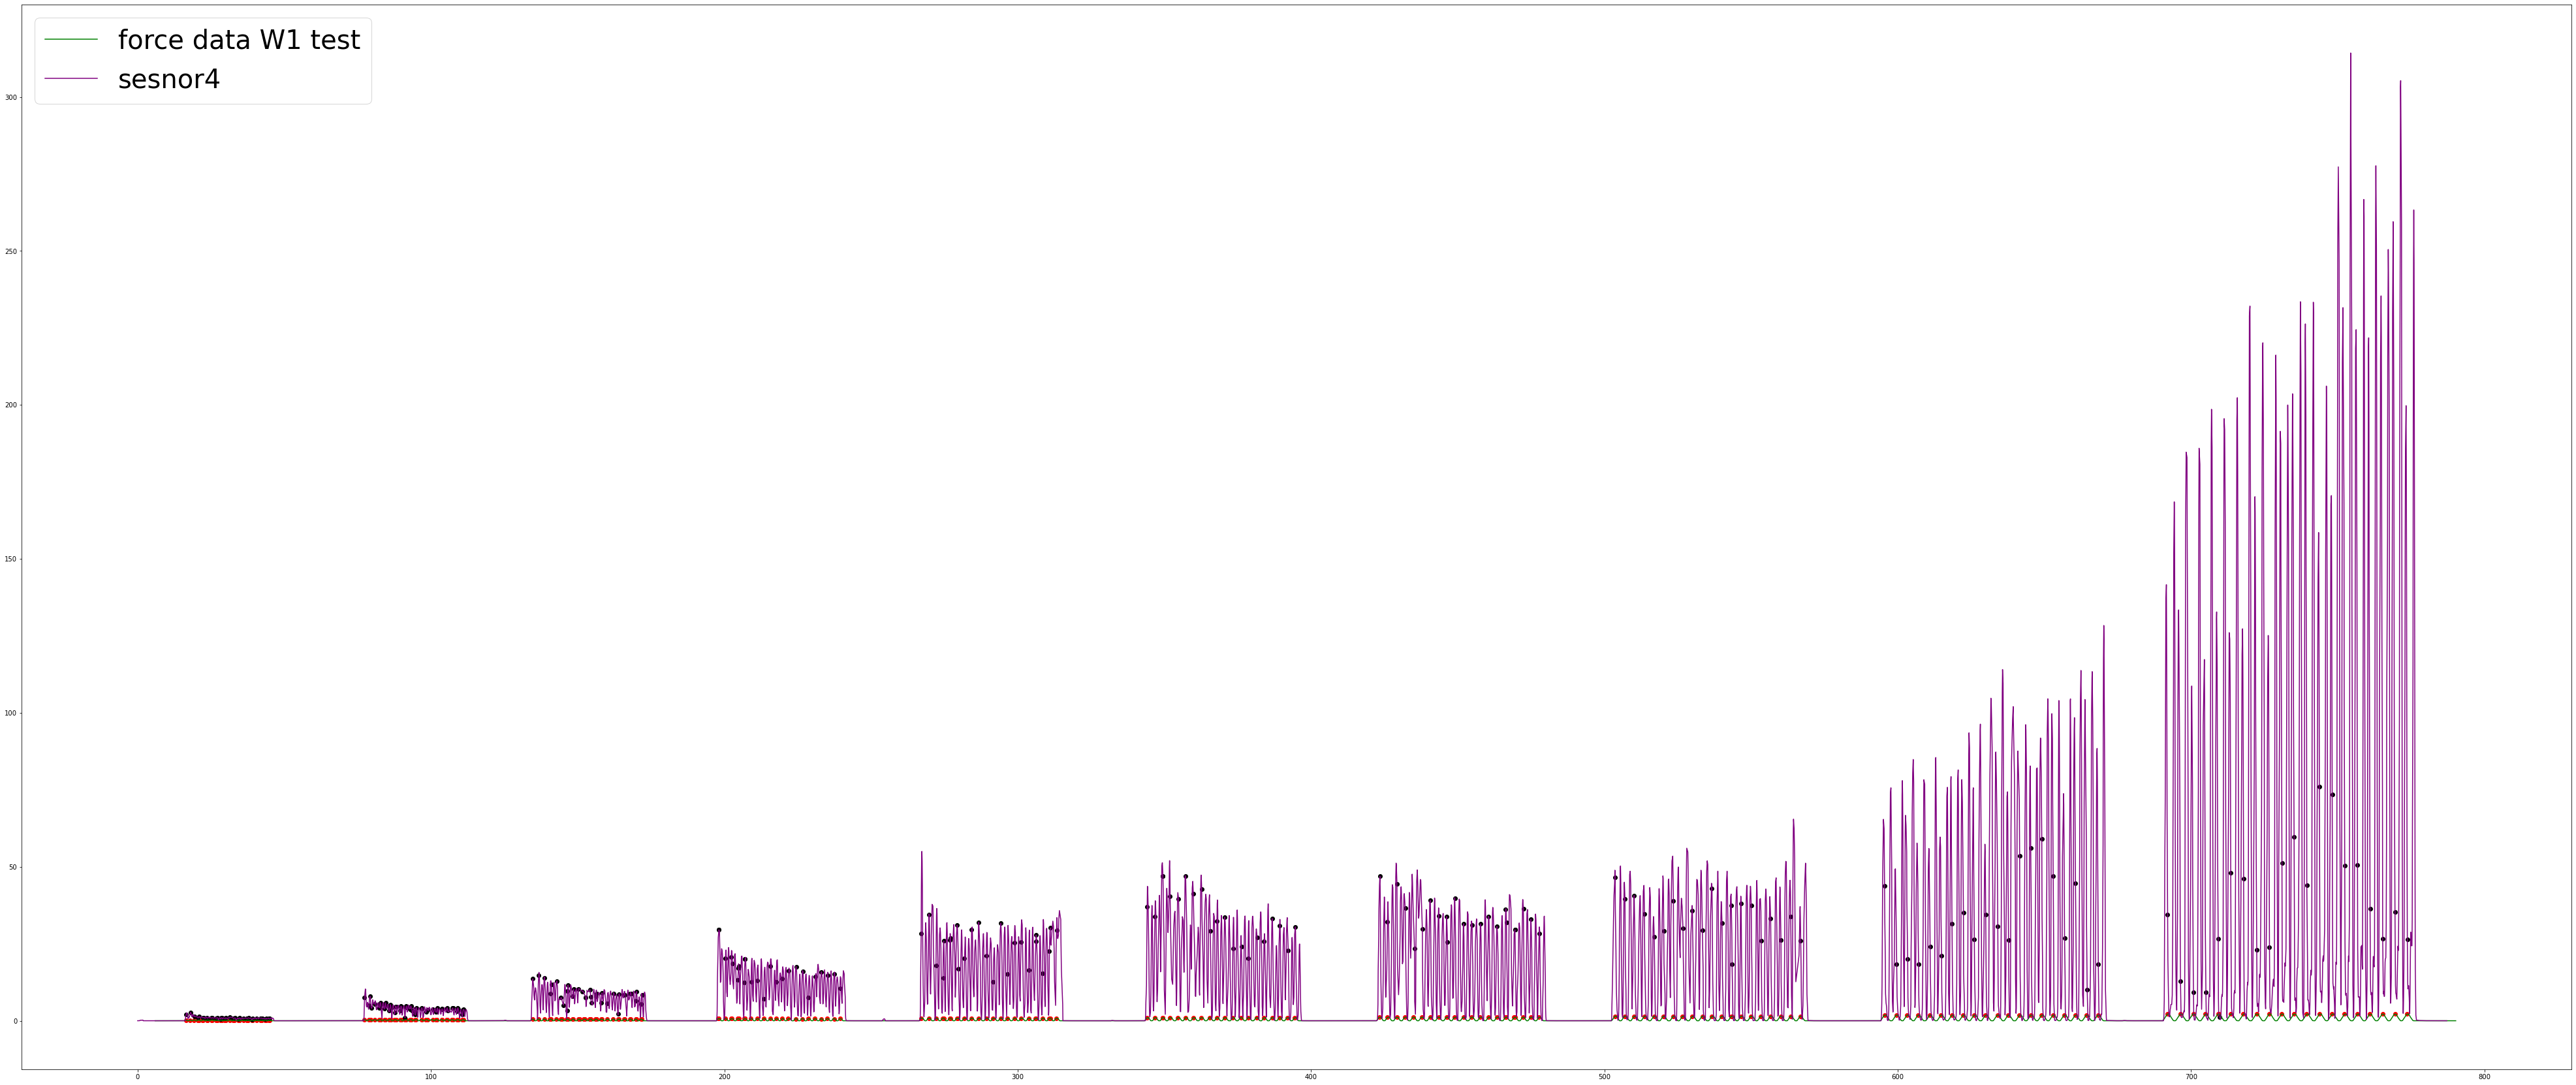

In [23]:
#visualizing and syncing the resistance data for each sensor S 1- 5 - W1

plt.figure(figsize=(70, 30))

# plt.plot(W1["Unnamed: 0"],W1["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(W1["Unnamed: 0"],W1["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(W1["Unnamed: 0"],W1["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(W1["Unnamed: 0"],W1["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_W1 = x_force_W1 + 6
scaled_W1 = W1["Unnamed: 0"]

plt.plot(scaled_x_force_W1,Load_W1,color = 'green', label = 'force data W1 test' )
plt.plot(scaled_W1,W1["s4_d"], color = 'purple', label = 'sesnor4')

plt.legend(fontsize=40)


print("Sensor 4 is more profound for W1")

#finding the peaks

pidx_Load_W1, _ = find_peaks(Load_W1,prominence= 0.05 )
peaks_Load_W1 = Load_W1[pidx_Load_W1]
peaks_Ltime_W1 = scaled_x_force_W1[pidx_Load_W1]

plt.scatter(peaks_Ltime_W1,peaks_Load_W1,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_W1time = []

peaks_Ltime_W1.reset_index(drop = True, inplace = True)
peaks_Load_W1.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_W1)):
    idx_W1time.append(bisect.bisect_left(W1["Unnamed: 0"], peaks_Ltime_W1[i]))

plt.scatter(W1["Unnamed: 0"][idx_W1time],W1["s4_d"][idx_W1time],color = 'black')

In [24]:
#Storing the peaks into csv file - W1
Load_W1peaks =[]

for i in range(len(peaks_Load_W1)):
    Load_W1peaks.append(peaks_Load_W1[i])
    
content_W1 = {'R1':W1["s1_d"][idx_W1time],
              'R2':W1["s2_d"][idx_W1time],
              'R3':W1["s3_d"][idx_W1time],
              'R4':W1["s4_d"][idx_W1time], 
              'Load': Load_W1peaks} 

df_W1 = pd.DataFrame(content_W1, columns = ['R1','R2','R3','R4','Load'])

df_W1.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\W1.csv',index = False, header = True)

Sensor 4 is more profound for W2


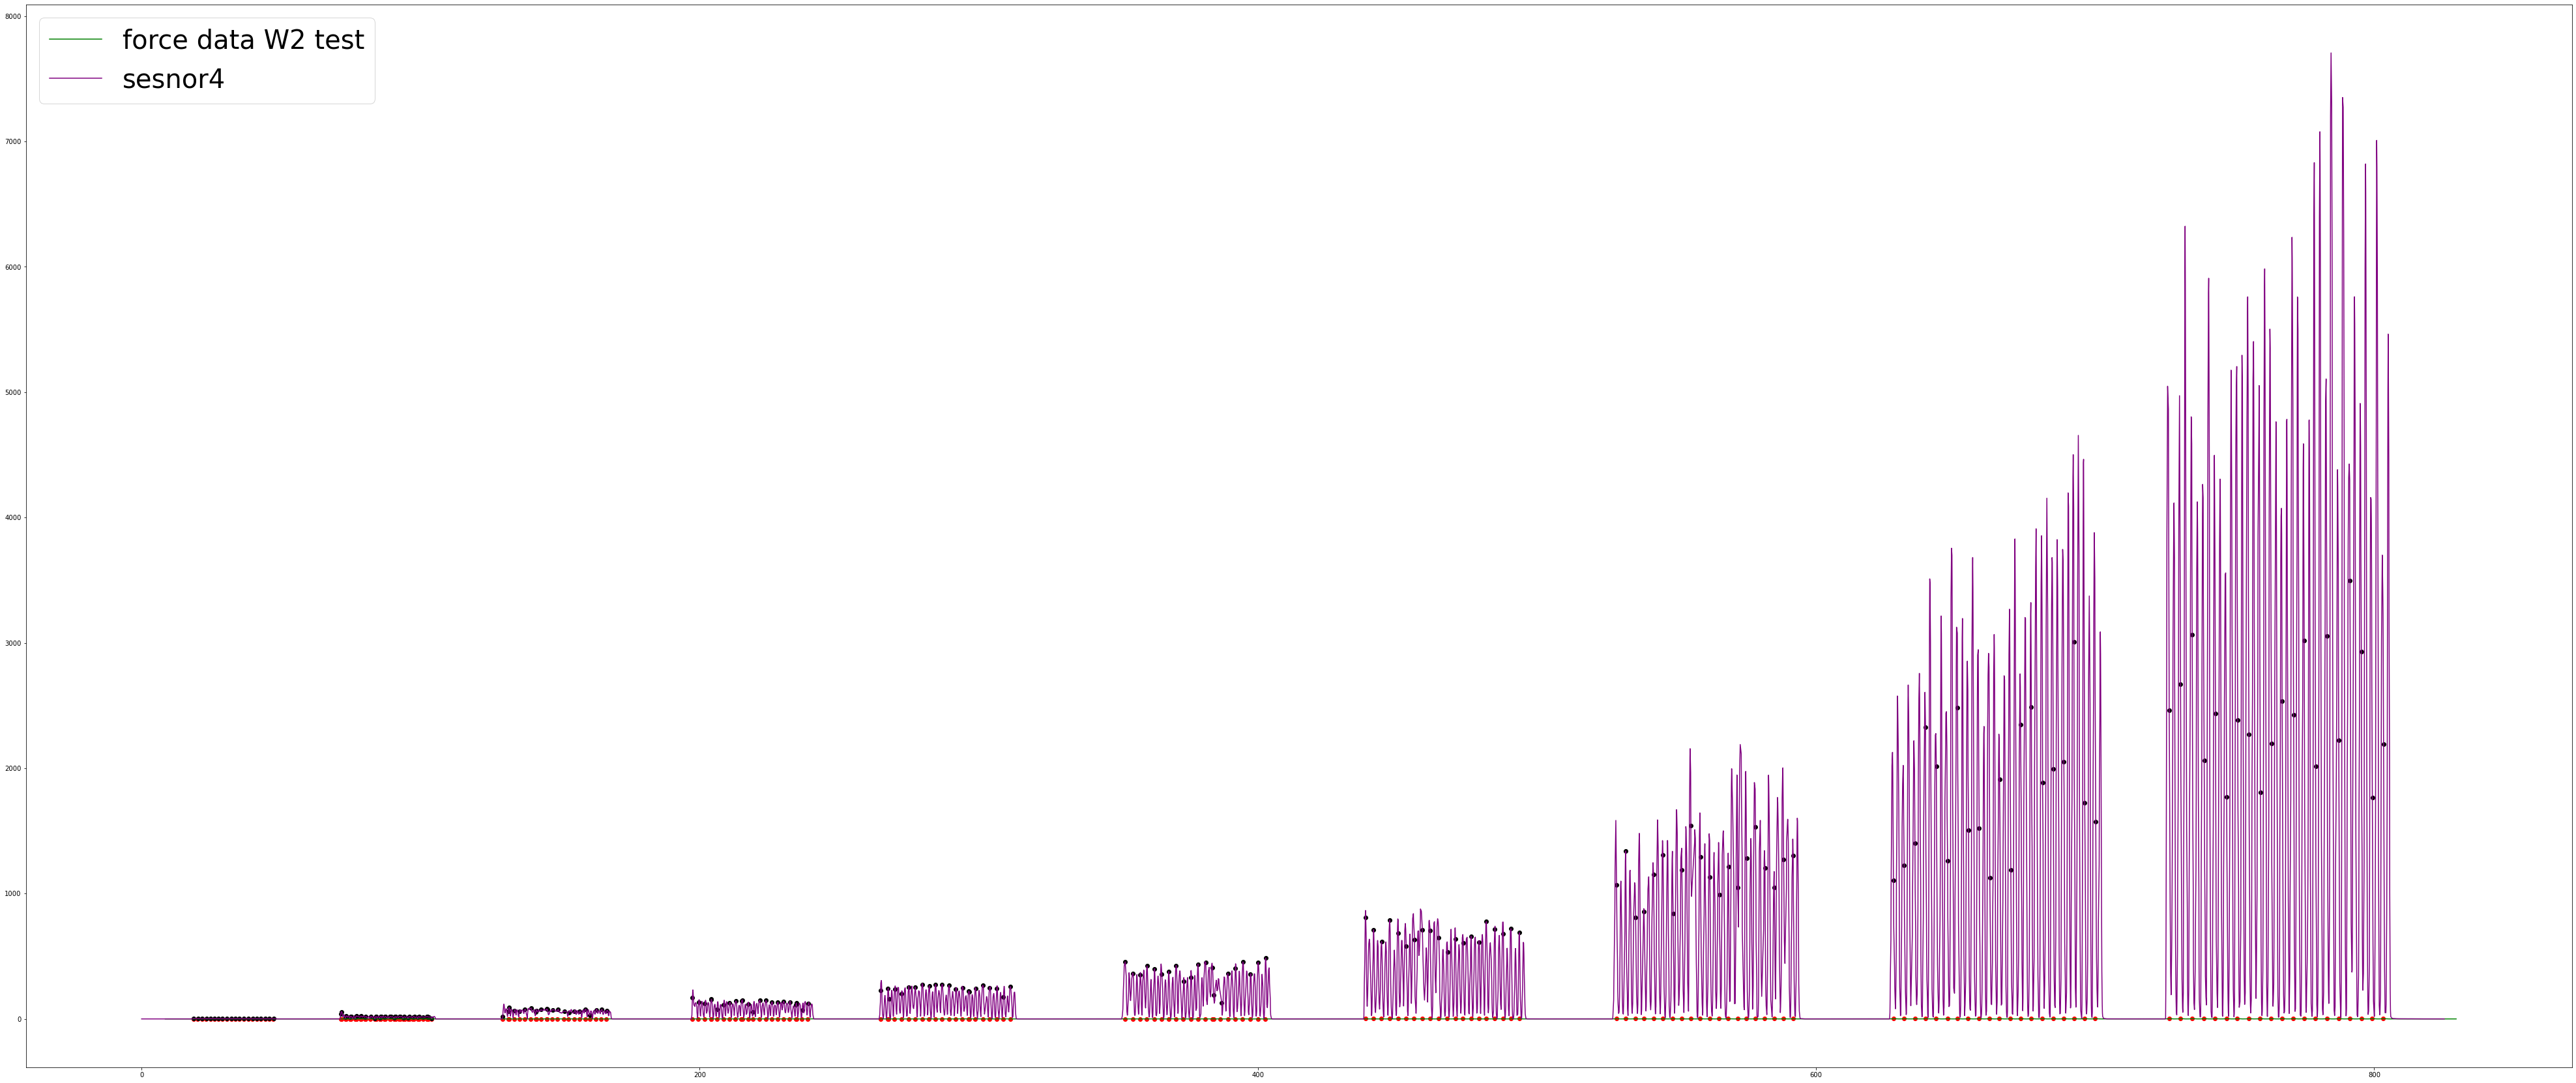

In [32]:
#visualizing and syncing the resistance data for each sensor S 1- 5 - W2

plt.figure(figsize=(70, 30))

# plt.plot(W2["Unnamed: 0"],W2["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(W2["Unnamed: 0"],W2["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(W2["Unnamed: 0"],W2["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(W2["Unnamed: 0"],W2["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_W2 = x_force_W2 + 8.5
scaled_W2 = W2["Unnamed: 0"]

plt.plot(scaled_x_force_W2,Load_W2,color = 'green', label = 'force data W2 test' )
plt.plot(scaled_W2,W2["s4_d"], color = 'purple', label = 'sesnor4')

plt.legend(fontsize=40)
print("Sensor 4 is more profound for W2")

#finding the peaks

pidx_Load_W2, _ = find_peaks(Load_W2,prominence= 0.05 )
peaks_Load_W2 = Load_W2[pidx_Load_W2]
peaks_Ltime_W2 = scaled_x_force_W2[pidx_Load_W2]

plt.scatter(peaks_Ltime_W2,peaks_Load_W2,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_W2time = []

peaks_Ltime_W2.reset_index(drop = True, inplace = True)
peaks_Load_W2.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_W2)):
    idx_W2time.append(bisect.bisect_left(W2["Unnamed: 0"], peaks_Ltime_W2[i]))

plt.scatter(W2["Unnamed: 0"][idx_W2time],W2["s4_d"][idx_W2time],color = 'black')

In [33]:
#Storing the peaks into csv file - W2
Load_W2peaks =[]

for i in range(len(peaks_Load_W2)):
    Load_W2peaks.append(peaks_Load_W2[i])
    
content_W2 = {'R1':W2["s1_d"][idx_W2time],
              'R2':W2["s2_d"][idx_W2time],
              'R3':W2["s3_d"][idx_W2time],
              'R4':W2["s4_d"][idx_W2time], 
              'Load': Load_W2peaks} 

df_W2 = pd.DataFrame(content_W2, columns = ['R1','R2','R3','R4','Load'])

df_W2.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\W2.csv',index = False, header = True)

Sensor 2 is more profound for W3


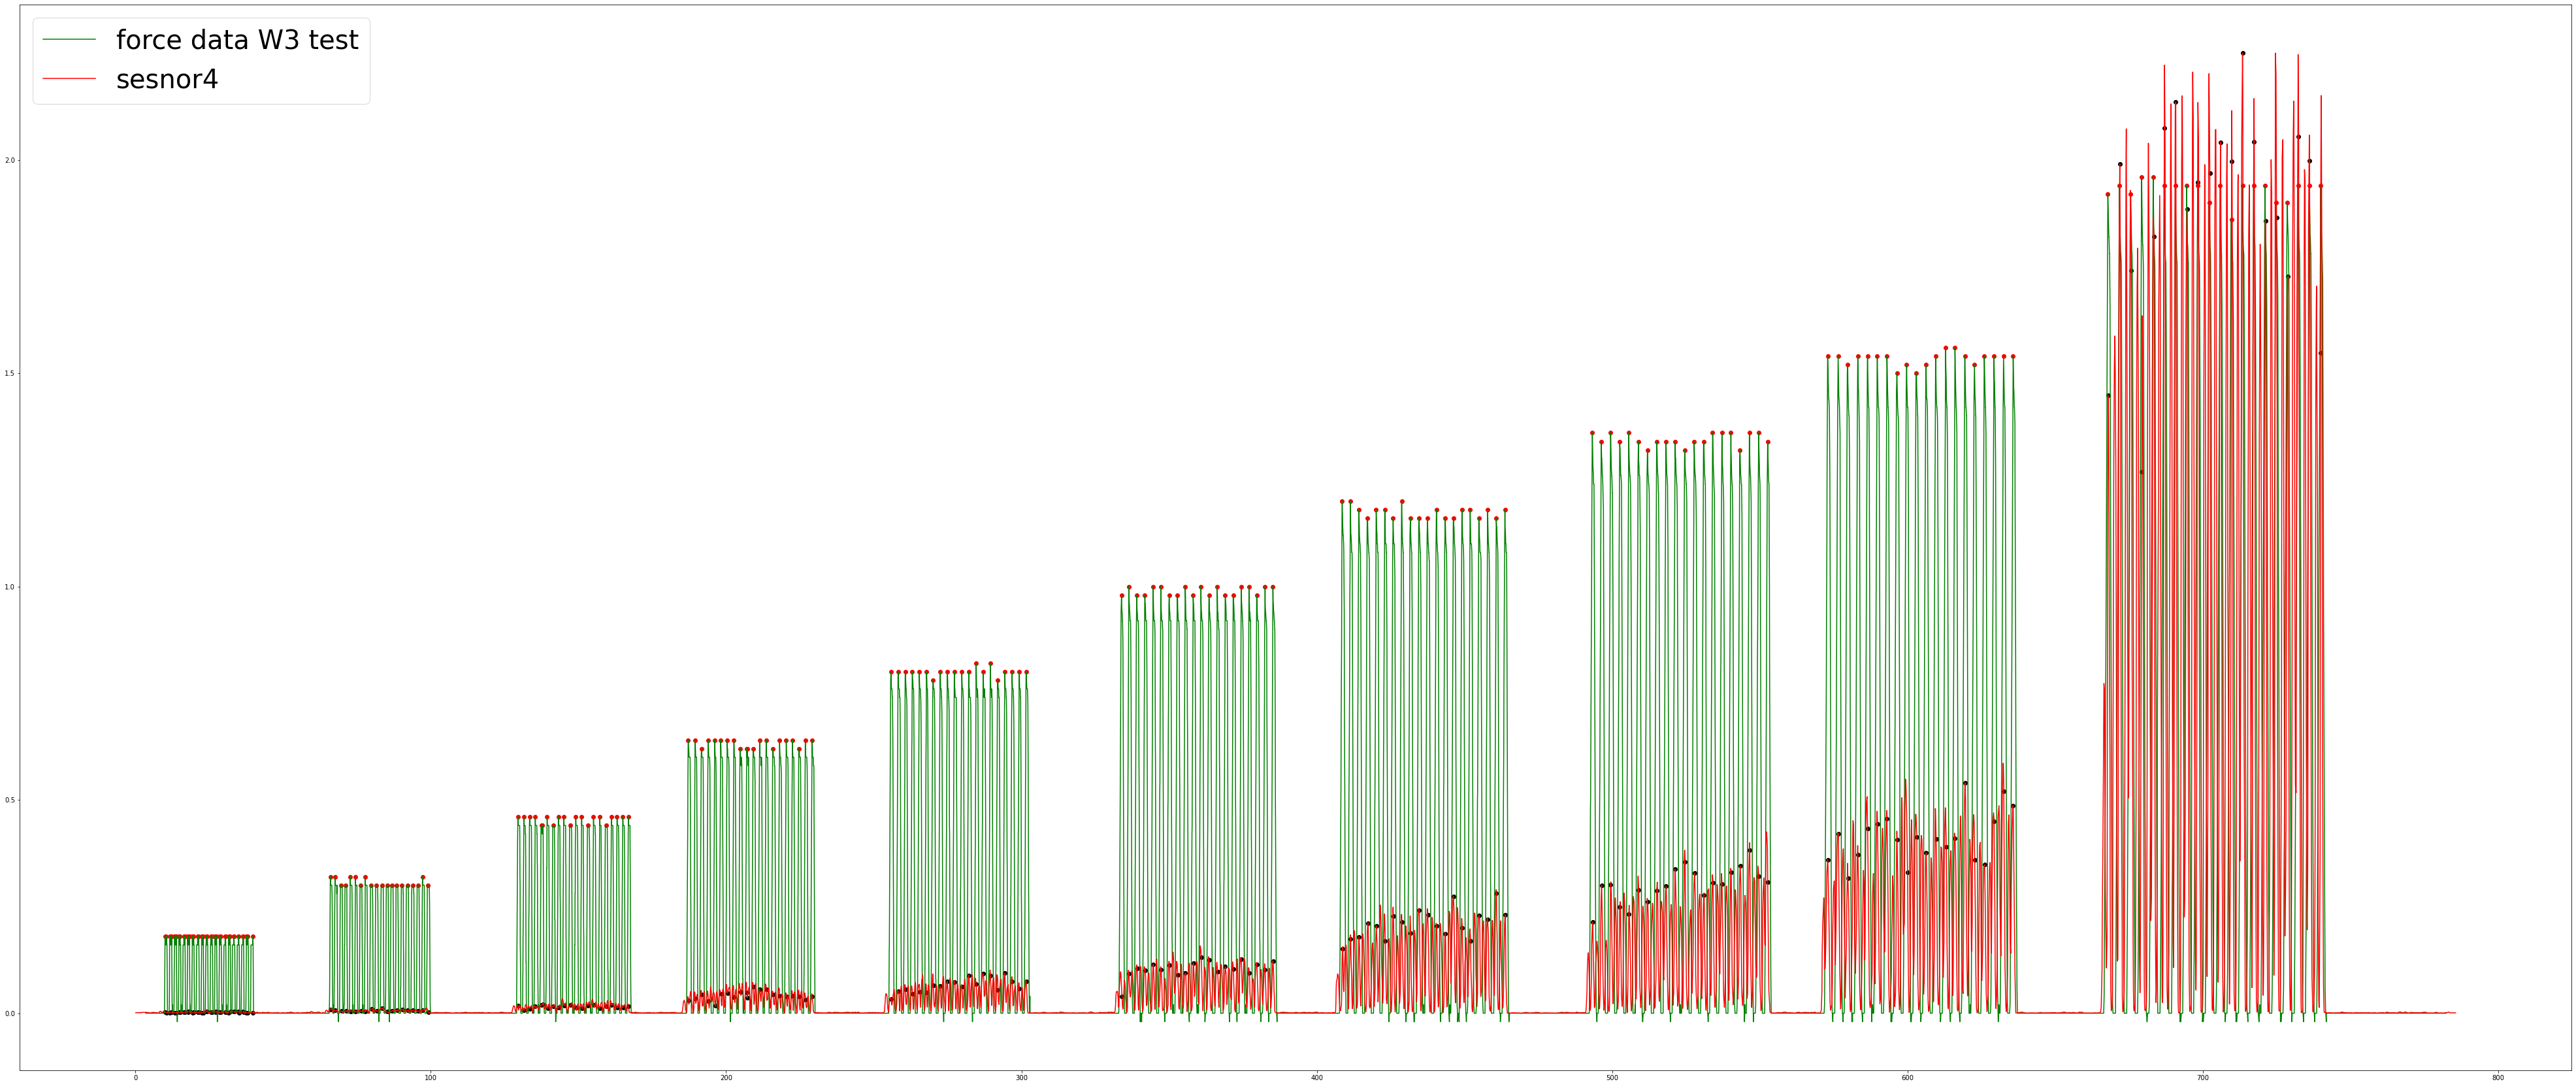

In [37]:
#visualizing and syncing the resistance data for each sensor S 1- 5 - W3

plt.figure(figsize=(70, 30))

# plt.plot(W3["Unnamed: 0"],W3["s1_d"], color = 'green', label = 'sesnor1')
# plt.plot(W3["Unnamed: 0"],W3["s2_d"], color = 'red', label = 'sesnor2')
# plt.plot(W3["Unnamed: 0"],W3["s3_d"], color = 'blue', label = 'sesnor3')
# plt.plot(W3["Unnamed: 0"],W3["s4_d"], color = 'purple', label = 'sesnor4')

scaled_x_force_W3 = x_force_W3 + 3.5
scaled_W3 = W3["Unnamed: 0"]

plt.plot(scaled_x_force_W3,Load_W3,color = 'green', label = 'force data W3 test' )
plt.plot(scaled_W3,W3["s2_d"], color = 'red', label = 'sesnor4')

plt.legend(fontsize=40)


print("Sensor 2 is more profound for W3")

#finding the peaks

pidx_Load_W3, _ = find_peaks(Load_W3,prominence= 0.05 )
peaks_Load_W3 = Load_W3[pidx_Load_W3]
peaks_Ltime_W3 = scaled_x_force_W3[pidx_Load_W3]

plt.scatter(peaks_Ltime_W3,peaks_Load_W3,color = 'red')

# df.iloc[(df['SPY'] - find_it).abs().argsort()[0],:]
idx_W3time = []

peaks_Ltime_W3.reset_index(drop = True, inplace = True)
peaks_Load_W3.reset_index(drop = True, inplace = True)

for i in range(len(peaks_Ltime_W3)):
    idx_W3time.append(bisect.bisect_left(W3["Unnamed: 0"], peaks_Ltime_W3[i]))

plt.scatter(W3["Unnamed: 0"][idx_W3time],W3["s2_d"][idx_W3time],color = 'black')

In [39]:
#Storing the peaks into csv file - W3
Load_W3peaks =[]

for i in range(len(peaks_Load_W3)):
    Load_W3peaks.append(peaks_Load_W3[i])
    
content_W3 = {'R1':W3["s1_d"][idx_W3time],
              'R2':W3["s2_d"][idx_W3time],
              'R3':W3["s3_d"][idx_W3time],
              'R4':W3["s4_d"][idx_W3time], 
              'Load': Load_W3peaks} 

df_W3 = pd.DataFrame(content_W3, columns = ['R1','R2','R3','R4','Load'])

df_W3.to_csv(r'C:\Users\fatem\Desktop\University\FYP\FK_dummytummy\Peaks_Data\W3.csv',index = False, header = True)